## TP Indextion:
### Realise par: Bernard LINDOR

# 1. Introduction

South Park D ialogues – Guess who’s talking?

◦ The dataset is annotated with Season,Episode,Character,Line.
By using the `line`, 
can you predict who is the character that said it `Character`?
The `Character` can be one of the characters in the animated series South Park.

### 1.1. Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# 2. Récupération, Prétraitement et Exploration du corpus de textes

In [4]:
df = pd.read_csv('D:\IFI_SIM_P24\Master_2\Indexation\TP_Indexation\Datasets/south_park_dialogues_dataset.csv')

In [5]:
### affichage des 5 premières lignes
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [6]:
### affichage des 5 dernières lignes
df.tail()

,Season,Episode,Character,Line
70891,9,14,Stan,I think you're pushing it.\n
70892,9,14,Randy,How about twenty?\n
70893,9,14,Stan,That's not disciprine.\n
70894,9,14,Randy,Right right. Does vodka count?\n
70895,9,14,Stan,Dad!\n


In [7]:
### affichage des Indicateurs statistiques
df.describe(include=[np.object])

,Season,Episode,Character,Line
count,70896,70896,70896,70896
unique,19,19,3950,64301
top,2,10,Cartman,What?\n
freq,6416,5271,9774,361


In [8]:
### affichage des personnages
len(df['Character'].unique())

3950

In [9]:
### affichage des 10 premiers personnages et leur nombre de dialiogues par ordre decroissant
df['Character'].value_counts().head(10)

Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Chef             917
Kenny            881
Sharon           862
Mr. Mackey       633
Name: Character, dtype: int64

In [12]:
### affichage des 10 derniers personnages ayant moins de dialogues
df['Character'].value_counts().tail(10)

Elderly Woman 6    1
Reveler            1
Alias 3            1
HC Driver 6        1
Patron 6           1
HC Driver 1        1
Confederate 1      1
Biker 11           1
Beast              1
Sheriff            1
Name: Character, dtype: int64

In [14]:
df = df.groupby('Character').filter(lambda x: len(x) > 2000)

In [15]:
df['Character'].value_counts()

Cartman    9774
Stan       7680
Kyle       7099
Butters    2602
Randy      2467
Name: Character, dtype: int64

# 3.  Prétraitement de texte 

In [16]:
df['Line'] = df['Line'].replace({'\n': ' '}, regex=True)

In [17]:
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...


### 3.1. Suppression des mots vides (stopwords)

In [19]:
!pip install nltk
!python -m nltk.downloader stopwords
!python -m nltk.downloader averaged_perceptron_tagger

C:\ProgramData\Anaconda3\lib\runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Berny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\ProgramData\Anaconda3\lib\runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Berny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
# Liste des stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Berny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def preprocess_texte(phrase):
    
    #Tokenisation
    tokens = nltk.word_tokenize(phrase)
    
    # Tenir compte que des mots avec plus d'un caractère
    tokens = [token for token in tokens if len(token) > 1]
    
    #Convertir en miniscule
    tokens = [word.lower() for word in tokens]
    
    #Supprimer la ponctuation et les caractères spéciaux
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if not word.isdigit()]
    
    #Supprimer les stopwords
    tokens = [word for word in tokens if word not in stopwords]

                             
    if len(tokens) > 1:
        return tokens
    return None

df['cleaned_text'] = df['Line'].apply(preprocess_texte)

In [24]:
df.head()

,Season,Episode,Character,Line,cleaned_text
0,10,1,Stan,"You guys, you guys! Chef is going away.","[guys, guys, chef, going, away]"
1,10,1,Kyle,Going away? For how long?,"[going, away, long]"
2,10,1,Stan,Forever.,None
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...","[chef, said, bored, joining, group, called, su..."
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,"[gon, na, miss, gon, na, miss, chef, know, tell]"


In [25]:
df['cleaned_text'].isnull().sum()

5705

In [26]:
df.dropna(subset=['cleaned_text'], inplace=True)

In [27]:
df['cleaned_text'].isnull().sum()

0

In [28]:
df.head()

,Season,Episode,Character,Line,cleaned_text
0,10,1,Stan,"You guys, you guys! Chef is going away.","[guys, guys, chef, going, away]"
1,10,1,Kyle,Going away? For how long?,"[going, away, long]"
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...","[chef, said, bored, joining, group, called, su..."
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,"[gon, na, miss, gon, na, miss, chef, know, tell]"
10,10,1,Stan,"Dude, how are we gonna go on? Chef was our fuh...","[dude, gon, na, go, chef, fuh]"


In [29]:
df['dialogue_length'] = df['cleaned_text'].apply(lambda tokens: len(tokens))

In [30]:
df.sort_values('dialogue_length', inplace=True)
df.head()

,Season,Episode,Character,Line,cleaned_text,dialogue_length
17904,15,5,Cartman,"He is real, you guys.","[real, guys]",2
22929,16,14,Kyle,What did Cartman tell you?!,"[cartman, tell]",2
8957,12,9,Cartman,Told you guys.,"[told, guys]",2
8958,12,9,Stan,"Ugh, I'm glad that's over with.","[ugh, glad]",2
59149,6,16,Stan,"That's not neato, that sucks.","[neato, sucks]",2


Line length statistics:
 count    23917.000000
mean         6.592591
std          6.268336
min          2.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        133.000000
Name: dialogue_length, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187F6782D88>,
      dtype=object)

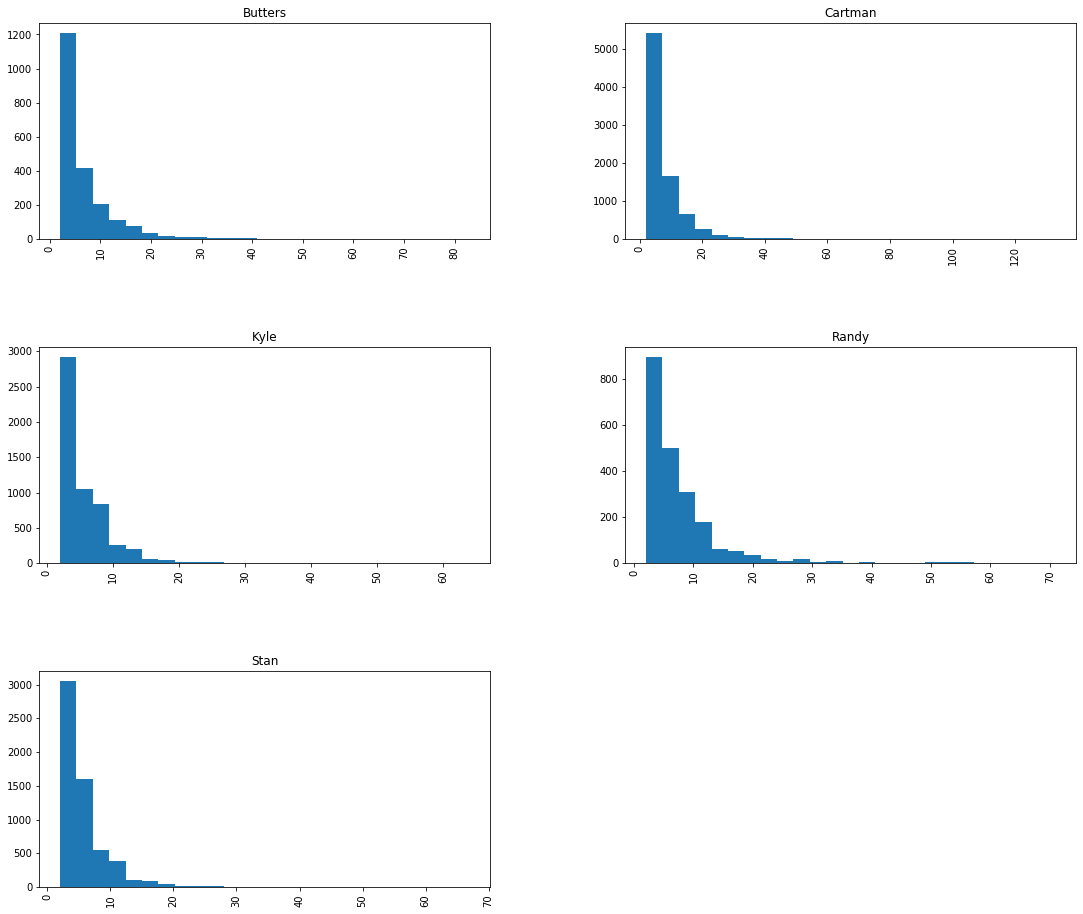

In [34]:
print('Line length statistics:\n', df['dialogue_length'].describe())
df.hist(column='dialogue_length',by='Character',bins=25, figsize=(18,16))

In [41]:
### Dialogue qui apparait plus que 6 fois
df = df[df['dialogue_length']>6]

In [42]:
df.head()

,Season,Episode,Character,Line,cleaned_text,dialogue_length
29651,1,6,Kyle,"Well, then you should. I think that a person h...","[well, think, person, right, die, wan, na]",7
60983,7,6,Cartman,"Bash, bash, BASH your skull in, causing instan...","[bash, bash, bash, skull, causing, instant, de...",7
9043,12,10,Randy,Oh look! Stan's eating a tater-tot! Wave to th...,"[oh, look, stan, eating, wave, camera, stan]",7
65532,8,7,Stan,"Dude, wait, wait, ho- hold on. Wait a second. ...","[dude, wait, wait, hold, wait, second, gay]",7
43072,3,14,Kyle,Yeah. He doesn't even know that the South lose...,"[yeah, even, know, south, loses, civil, war]",7


In [44]:
# Les termes les plus courants du corpus
freq = nltk.FreqDist(np.hstack(df['cleaned_text']))

# Les 30 termes les plus courants du corpus
print(freq.most_common(30))

[('na', 1393), ('get', 1116), ('gon', 1042), ('oh', 1031), ('know', 960), ('go', 926), ('like', 916), ('got', 850), ('guys', 822), ('well', 810), ('right', 786), ('kyle', 750), ('us', 721), ('yeah', 696), ('people', 689), ('see', 670), ('come', 605), ('think', 597), ('dude', 569), ('let', 565), ('ca', 533), ('uh', 522), ('one', 516), ('look', 506), ('time', 492), ('really', 492), ('okay', 455), ('back', 454), ('hey', 425), ('kenny', 417)]


In [47]:
# List des Co-occurences
list(nltk.ngrams(np.hstack(df['cleaned_text']),2))[:15]

[('well', 'think'),
 ('think', 'person'),
 ('person', 'right'),
 ('right', 'die'),
 ('die', 'wan'),
 ('wan', 'na'),
 ('na', 'bash'),
 ('bash', 'bash'),
 ('bash', 'bash'),
 ('bash', 'skull'),
 ('skull', 'causing'),
 ('causing', 'instant'),
 ('instant', 'death'),
 ('death', 'oh'),
 ('oh', 'look')]

In [48]:
#### Convertion de la liste des mots des dialogues au format text
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([item for item in x]))

In [51]:
print(df.shape[0])
print(df['Character'].value_counts())

8219
Cartman    3497
Stan       1642
Kyle       1479
Randy       844
Butters     757
Name: Character, dtype: int64


### 3.1.1. Lemmatization

In [58]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

In [59]:
POS_TAG_CORRESPONDANCE = {"j": wordnet.ADJ,
                              "n": wordnet.NOUN, 
                              "v": wordnet.VERB, 
                              "r": wordnet.ADV}

In [60]:
# Initialiser WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatisation(phrase):
    #Dictionnaire pour definir les correspondance entre la valeur renvoyé par nltk.pos_tag et Wordnet 
    #qu'on passera en paramètre
    POS_TAG_CORRESPONDANCE = {"j": wordnet.ADJ,
                              "n": wordnet.NOUN, 
                              "v": wordnet.VERB, 
                              "r": wordnet.ADV}

    # Appliquer la lemmatization en fonction du pos_tag.
    tokens = nltk.word_tokenize(phrase)
    for idx, word in enumerate(nltk.pos_tag(tokens)):
        #print(word)
        l = word[1][0].lower()
        if l in POS_TAG_CORRESPONDANCE.keys():
            pos_tag_word = POS_TAG_CORRESPONDANCE.get(l)
        else:
            pos_tag_word = wordnet.NOUN
        #print(pos_tag_word)
        tokens[idx] = lemmatizer.lemmatize(word[0], pos_tag_word)
        
        #print(lemmatizer.lemmatize(word[0], tag_word))
                             
    if len(tokens) > 1:
        return tokens
    return None

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatisation)
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: ' '.join([item for item in x]))

In [61]:
df.head()

,Season,Episode,Character,Line,cleaned_text,dialogue_length,lemmatized_text
29651,1,6,Kyle,"Well, then you should. I think that a person h...",well think person right die wan na,7,well think person right die wan na
60983,7,6,Cartman,"Bash, bash, BASH your skull in, causing instan...",bash bash bash skull causing instant death,7,bash bash bash skull cause instant death
9043,12,10,Randy,Oh look! Stan's eating a tater-tot! Wave to th...,oh look stan eating wave camera stan,7,oh look stan eating wave camera stan
65532,8,7,Stan,"Dude, wait, wait, ho- hold on. Wait a second. ...",dude wait wait hold wait second gay,7,dude wait wait hold wait second gay
43072,3,14,Kyle,Yeah. He doesn't even know that the South lose...,yeah even know south loses civil war,7,yeah even know south loses civil war


### 3.1.2. Racinisation

In [62]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

In [63]:
def preprocess_stemming(phrase):
    
    #Tokenisation
    tokens = nltk.word_tokenize(phrase)
    
    # La racinisation
    tokens = [stemmer.stem(token) for token in tokens ]
                             
    if len(tokens) > 1:
        return tokens
    return None

df['stemming_text'] = df['cleaned_text'].apply(preprocess_stemming)
df['stemming_text'] = df['stemming_text'].apply(lambda x: ' '.join([item for item in x]))

In [64]:
df.head()

,Season,Episode,Character,Line,cleaned_text,dialogue_length,lemmatized_text,stemming_text
29651,1,6,Kyle,"Well, then you should. I think that a person h...",well think person right die wan na,7,well think person right die wan na,well think person right die wan na
60983,7,6,Cartman,"Bash, bash, BASH your skull in, causing instan...",bash bash bash skull causing instant death,7,bash bash bash skull cause instant death,bash bash bash skull caus instant death
9043,12,10,Randy,Oh look! Stan's eating a tater-tot! Wave to th...,oh look stan eating wave camera stan,7,oh look stan eating wave camera stan,oh look stan eat wave camera stan
65532,8,7,Stan,"Dude, wait, wait, ho- hold on. Wait a second. ...",dude wait wait hold wait second gay,7,dude wait wait hold wait second gay,dude wait wait hold wait second gay
43072,3,14,Kyle,Yeah. He doesn't even know that the South lose...,yeah even know south loses civil war,7,yeah even know south loses civil war,yeah even know south lose civil war


## 4. Representation des mots

### 4.1. « *bag of words* » (sac de mots)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
vectorizer = CountVectorizer(min_df=4)
vectorizer.fit(np.hstack(df['cleaned_text']))

X = vectorizer.transform(np.hstack(df['cleaned_text']))

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8209,8210,8211,8212,8213,8214,8215,8216,8217,8218
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaahhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aborted,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0
abortion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
vectorizer = TfidfVectorizer(min_df=4, lowercase=True, stop_words=None)
vectors = vectorizer.fit_transform(np.hstack(df['cleaned_text']))

pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names()).T

,0,1,2,3,4,5,6,7,8,9,...,8209,8210,8211,8212,8213,8214,8215,8216,8217,8218
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaahhh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yup,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yyeah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ziplining,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df.head()

,Season,Episode,Character,Line,cleaned_text,dialogue_length,lemmatized_text,stemming_text
29651,1,6,Kyle,"Well, then you should. I think that a person h...",well think person right die wan na,7,well think person right die wan na,well think person right die wan na
60983,7,6,Cartman,"Bash, bash, BASH your skull in, causing instan...",bash bash bash skull causing instant death,7,bash bash bash skull cause instant death,bash bash bash skull caus instant death
9043,12,10,Randy,Oh look! Stan's eating a tater-tot! Wave to th...,oh look stan eating wave camera stan,7,oh look stan eating wave camera stan,oh look stan eat wave camera stan
65532,8,7,Stan,"Dude, wait, wait, ho- hold on. Wait a second. ...",dude wait wait hold wait second gay,7,dude wait wait hold wait second gay,dude wait wait hold wait second gay
43072,3,14,Kyle,Yeah. He doesn't even know that the South lose...,yeah even know south loses civil war,7,yeah even know south loses civil war,yeah even know south lose civil war


# 5. Preparation pour apprentissage automatique (machine learning) et apprentissage profond (deep learning)

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [75]:
# Les algorithmes a utiliser 
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Ada Boosting": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
}

In [85]:
# Classification

def training_models(X_train, y_train, X_test):
    '''
    Fonction pour entrainer les differents modèles et reporter les metriques.
    input: données d'entrainement et de test
    output: precision, rappel, f1-score, matrice de confusion de chaque classifier
    
    '''
    symbole1 = "***"
    symbole2 = " "
    
    
    for key, classifier in classifiers.items():
        print(20*symbole1)
        print(symbole2*10 ,key)
        print(20*symbole1)

        # Entrainement du modèle
        classifier.fit(X_train, y_train)
        
        # Prédiction sur les données de test
        y_pred = classifier.predict(X_test)

        print(" les principales Metriques de classification:\n", classification_report(y_test, y_pred))
        
        # Matrice de confusion
        sns.heatmap(confusion_matrix(y_test, y_pred, labels = list(set(y_train))), 
                    annot=True, 
                    xticklabels=set(y_train),
                    yticklabels=set(y_train))
        
        plt.ylabel('Vraies classes')
        plt.xlabel('Classes prédites')
        plt.show()

###  5.1. CountVectorizer

#### Utilisation des Données normalisées avec la lemmatization

In [79]:
# Extraction des caractéristiques
vectorizer = CountVectorizer(min_df = 5, lowercase = False, ngram_range=(1, 3))

X = vectorizer.fit_transform(df['lemmatized_text']).toarray()
y = df['Character']

###  5.2. Diviser les jeux de données

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
len(X_train), len(X_test)

(6575, 1644)

************************************************************
           Naive Bayes
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.55      0.37      0.44       161
     Cartman       0.62      0.72      0.66       694
        Kyle       0.41      0.35      0.38       284
       Randy       0.56      0.40      0.47       185
        Stan       0.41      0.46      0.43       320

    accuracy                           0.53      1644
   macro avg       0.51      0.46      0.48      1644
weighted avg       0.53      0.53      0.53      1644



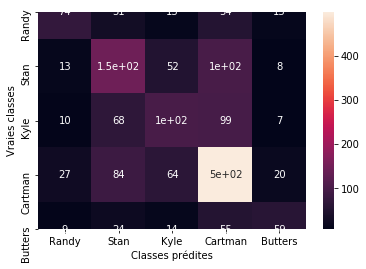

************************************************************
           Support Vector Machine
************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.41      0.34      0.37       161
     Cartman       0.60      0.66      0.63       694
        Kyle       0.34      0.33      0.34       284
       Randy       0.50      0.36      0.42       185
        Stan       0.35      0.36      0.35       320

    accuracy                           0.48      1644
   macro avg       0.44      0.41      0.42      1644
weighted avg       0.48      0.48      0.48      1644



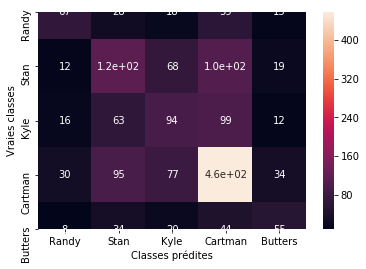

************************************************************
           Decision Tree
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.34      0.20      0.26       161
     Cartman       0.53      0.63      0.58       694
        Kyle       0.30      0.25      0.27       284
       Randy       0.40      0.26      0.32       185
        Stan       0.30      0.34      0.32       320

    accuracy                           0.43      1644
   macro avg       0.37      0.34      0.35      1644
weighted avg       0.41      0.43      0.41      1644



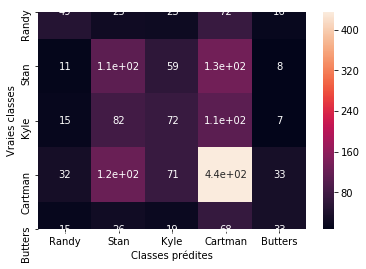

************************************************************
           Ada Boosting
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.57      0.31      0.40       161
     Cartman       0.49      0.91      0.64       694
        Kyle       0.51      0.18      0.27       284
       Randy       0.68      0.21      0.32       185
        Stan       0.45      0.17      0.24       320

    accuracy                           0.50      1644
   macro avg       0.54      0.35      0.37      1644
weighted avg       0.52      0.50      0.44      1644



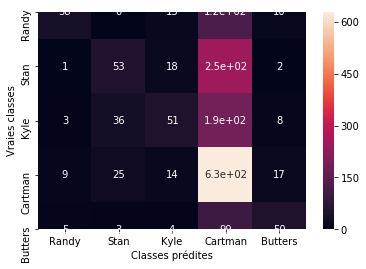

************************************************************
           Random Forest
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.46      0.25      0.33       161
     Cartman       0.52      0.84      0.64       694
        Kyle       0.39      0.25      0.31       284
       Randy       0.62      0.20      0.30       185
        Stan       0.35      0.19      0.25       320

    accuracy                           0.48      1644
   macro avg       0.47      0.35      0.36      1644
weighted avg       0.47      0.48      0.44      1644



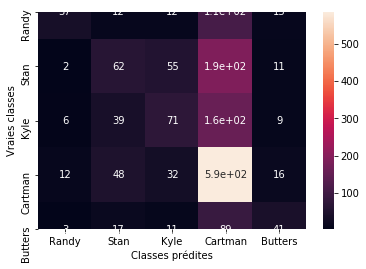

************************************************************
           Logistic Regression
************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.59      0.32      0.41       161
     Cartman       0.60      0.78      0.68       694
        Kyle       0.38      0.31      0.34       284
       Randy       0.61      0.37      0.46       185
        Stan       0.42      0.41      0.42       320

    accuracy                           0.53      1644
   macro avg       0.52      0.44      0.46      1644
weighted avg       0.53      0.53      0.52      1644



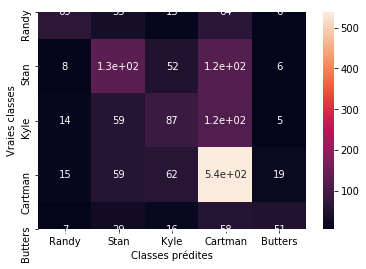

In [86]:
training_models(X_train, y_train, X_test)

####  Utilisation des Données normalisées avec la racinisation

In [87]:
# Extraction de caractéristiques
vectorizer = CountVectorizer(min_df = 5, lowercase = False, ngram_range=(1, 3))
X = vectorizer.fit_transform(df['stemming_text']).toarray()
y = df['Character']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
len(X_train), len(X_test)

(5753, 2466)

************************************************************
           Naive Bayes
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.54      0.37      0.44       244
     Cartman       0.61      0.71      0.66      1041
        Kyle       0.41      0.34      0.37       437
       Randy       0.52      0.38      0.44       265
        Stan       0.41      0.45      0.43       479

    accuracy                           0.53      2466
   macro avg       0.50      0.45      0.47      2466
weighted avg       0.52      0.53      0.52      2466



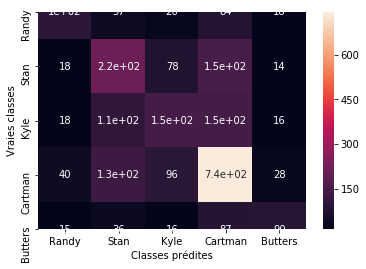

************************************************************
           Support Vector Machine
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.43      0.36      0.39       244
     Cartman       0.61      0.64      0.63      1041
        Kyle       0.33      0.32      0.33       437
       Randy       0.48      0.36      0.41       265
        Stan       0.34      0.39      0.36       479

    accuracy                           0.48      2466
   macro avg       0.44      0.42      0.42      2466
weighted avg       0.48      0.48      0.48      2466



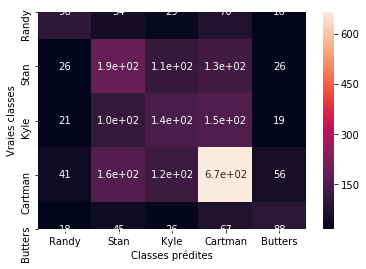

************************************************************
           Decision Tree
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.32      0.25      0.28       244
     Cartman       0.53      0.60      0.56      1041
        Kyle       0.32      0.29      0.31       437
       Randy       0.40      0.31      0.35       265
        Stan       0.28      0.29      0.29       479

    accuracy                           0.42      2466
   macro avg       0.37      0.35      0.36      2466
weighted avg       0.41      0.42      0.41      2466



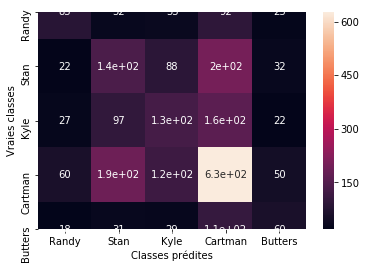

************************************************************
           Ada Boosting
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.56      0.29      0.38       244
     Cartman       0.49      0.90      0.64      1041
        Kyle       0.49      0.18      0.26       437
       Randy       0.69      0.23      0.35       265
        Stan       0.45      0.16      0.24       479

    accuracy                           0.50      2466
   macro avg       0.54      0.35      0.37      2466
weighted avg       0.51      0.50      0.44      2466



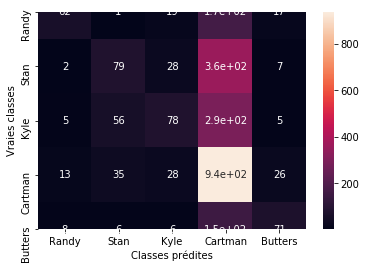

************************************************************
           Random Forest
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.47      0.31      0.37       244
     Cartman       0.52      0.81      0.63      1041
        Kyle       0.40      0.24      0.30       437
       Randy       0.54      0.22      0.31       265
        Stan       0.37      0.24      0.29       479

    accuracy                           0.49      2466
   macro avg       0.46      0.36      0.38      2466
weighted avg       0.47      0.49      0.45      2466



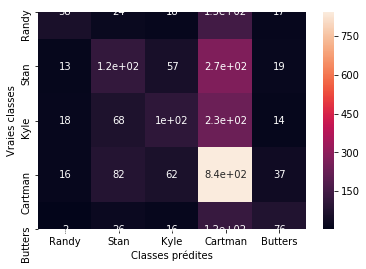

************************************************************
           Logistic Regression
************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.56      0.34      0.43       244
     Cartman       0.61      0.78      0.68      1041
        Kyle       0.40      0.32      0.35       437
       Randy       0.60      0.37      0.46       265
        Stan       0.41      0.40      0.40       479

    accuracy                           0.54      2466
   macro avg       0.51      0.44      0.47      2466
weighted avg       0.53      0.54      0.52      2466



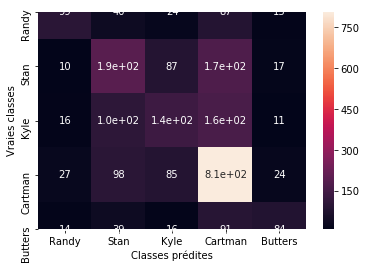

In [89]:
training_models(X_train, y_train, X_test)

## TF-IDF

Utilisation d'un vectoriseur tf-idf pondéré

### Utilisation des Données normalisées avec la lemmatization

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

X = vectorizer.fit_transform(dataset['lemmatized_text']).toarray()
y = dataset['Character']

In [125]:
# Diviser le jeu de données en 70% train et 20% test
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
len(X_train), len(X_test)

(7191, 3082)

<><><><><><><><><><><><><><><><><><><><>
           Naive Bayes
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       1.00      0.02      0.04       274
     Cartman       0.43      0.98      0.59      1262
        Kyle       0.60      0.05      0.09       590
       Randy       1.00      0.00      0.01       319
        Stan       0.41      0.08      0.14       637

    accuracy                           0.43      3082
   macro avg       0.69      0.23      0.17      3082
weighted avg       0.57      0.43      0.29      3082



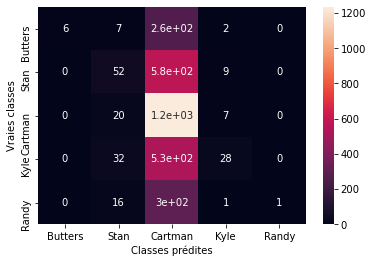

<><><><><><><><><><><><><><><><><><><><>
           Support Vector Machine
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.57      0.40      0.47       274
     Cartman       0.59      0.71      0.64      1262
        Kyle       0.39      0.34      0.36       590
       Randy       0.58      0.40      0.48       319
        Stan       0.40      0.38      0.39       637

    accuracy                           0.51      3082
   macro avg       0.50      0.45      0.47      3082
weighted avg       0.51      0.51      0.50      3082



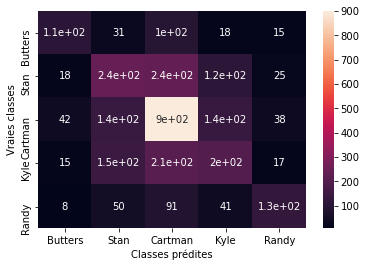

<><><><><><><><><><><><><><><><><><><><>
           Decision Tree
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.33      0.26      0.29       274
     Cartman       0.53      0.61      0.56      1262
        Kyle       0.36      0.33      0.34       590
       Randy       0.37      0.29      0.32       319
        Stan       0.30      0.29      0.29       637

    accuracy                           0.42      3082
   macro avg       0.38      0.35      0.36      3082
weighted avg       0.41      0.42      0.42      3082



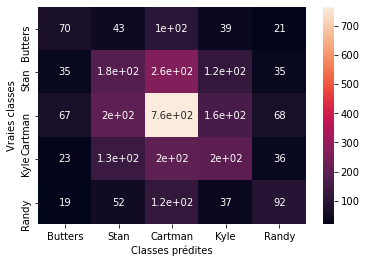

<><><><><><><><><><><><><><><><><><><><>
           Ada Boosting
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.48      0.23      0.31       274
     Cartman       0.48      0.83      0.61      1262
        Kyle       0.41      0.23      0.30       590
       Randy       0.56      0.25      0.34       319
        Stan       0.38      0.17      0.24       637

    accuracy                           0.47      3082
   macro avg       0.46      0.34      0.36      3082
weighted avg       0.45      0.47      0.42      3082



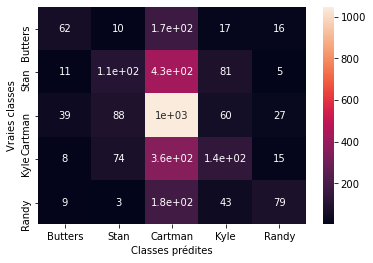

<><><><><><><><><><><><><><><><><><><><>
           Random Forest
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.70      0.19      0.30       274
     Cartman       0.50      0.87      0.64      1262
        Kyle       0.48      0.27      0.34       590
       Randy       0.79      0.19      0.31       319
        Stan       0.43      0.28      0.34       637

    accuracy                           0.50      3082
   macro avg       0.58      0.36      0.39      3082
weighted avg       0.53      0.50      0.46      3082



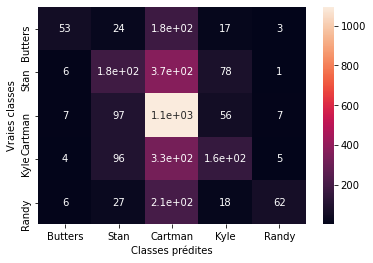

<><><><><><><><><><><><><><><><><><><><>
           Logistic Regression
<><><><><><><><><><><><><><><><><><><><>


/home/daj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.67      0.24      0.35       274
     Cartman       0.53      0.84      0.65      1262
        Kyle       0.44      0.27      0.34       590
       Randy       0.68      0.22      0.33       319
        Stan       0.40      0.33      0.36       637

    accuracy                           0.51      3082
   macro avg       0.55      0.38      0.41      3082
weighted avg       0.52      0.51      0.47      3082



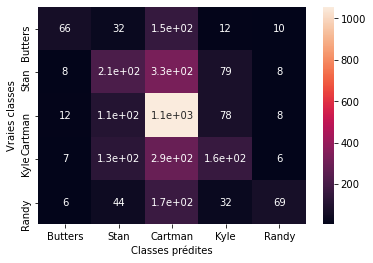

In [127]:
training_models(X_train, y_train, X_test)

### Utilisation des Données normalisées avec la racinisation

In [90]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

X = vectorizer.fit_transform(df['stemming_text']).toarray()
y = df['Character']

In [91]:
# Diviser le jeu de données en 70% train et 20% test
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
len(X_train), len(X_test)

(6575, 1644)

************************************************************
           Naive Bayes
************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       1.00      0.01      0.02       161
     Cartman       0.43      1.00      0.60       694
        Kyle       0.67      0.02      0.04       284
       Randy       0.00      0.00      0.00       185
        Stan       0.54      0.06      0.11       320

    accuracy                           0.44      1644
   macro avg       0.53      0.22      0.16      1644
weighted avg       0.50      0.44      0.29      1644



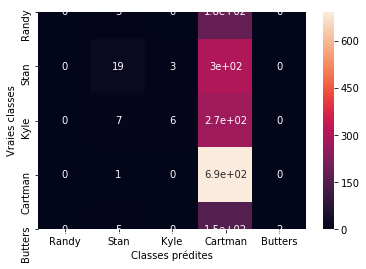

************************************************************
           Support Vector Machine
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.62      0.36      0.45       161
     Cartman       0.62      0.77      0.69       694
        Kyle       0.36      0.30      0.33       284
       Randy       0.64      0.39      0.48       185
        Stan       0.44      0.46      0.45       320

    accuracy                           0.55      1644
   macro avg       0.53      0.46      0.48      1644
weighted avg       0.54      0.55      0.53      1644



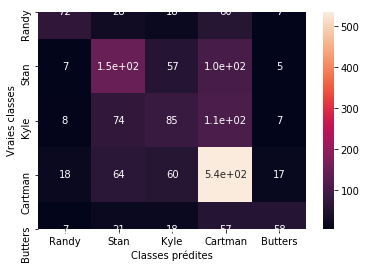

************************************************************
           Decision Tree
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.39      0.27      0.32       161
     Cartman       0.54      0.62      0.58       694
        Kyle       0.30      0.27      0.28       284
       Randy       0.41      0.28      0.33       185
        Stan       0.30      0.32      0.31       320

    accuracy                           0.43      1644
   macro avg       0.39      0.35      0.36      1644
weighted avg       0.42      0.43      0.42      1644



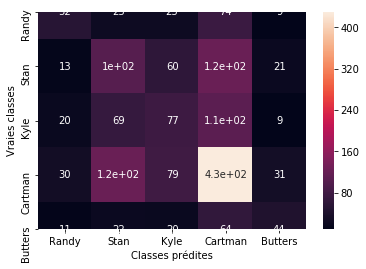

************************************************************
           Ada Boosting
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.52      0.27      0.36       161
     Cartman       0.50      0.86      0.63       694
        Kyle       0.54      0.16      0.24       284
       Randy       0.59      0.30      0.40       185
        Stan       0.44      0.25      0.32       320

    accuracy                           0.50      1644
   macro avg       0.52      0.37      0.39      1644
weighted avg       0.51      0.50      0.45      1644



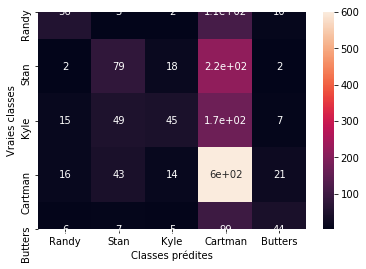

************************************************************
           Random Forest
************************************************************
 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.66      0.23      0.34       161
     Cartman       0.51      0.83      0.63       694
        Kyle       0.36      0.23      0.28       284
       Randy       0.64      0.26      0.37       185
        Stan       0.37      0.25      0.30       320

    accuracy                           0.49      1644
   macro avg       0.51      0.36      0.38      1644
weighted avg       0.49      0.49      0.45      1644



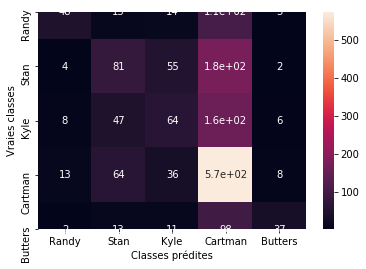

************************************************************
           Logistic Regression
************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 les principales Metriques de classification:
               precision    recall  f1-score   support

     Butters       0.66      0.16      0.25       161
     Cartman       0.53      0.92      0.67       694
        Kyle       0.47      0.23      0.30       284
       Randy       0.83      0.19      0.31       185
        Stan       0.48      0.32      0.38       320

    accuracy                           0.53      1644
   macro avg       0.59      0.36      0.38      1644
weighted avg       0.55      0.53      0.47      1644



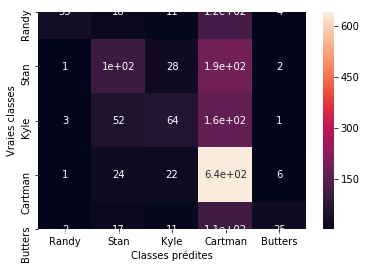

In [93]:
training_models(X_train, y_train, X_test)

Parmi les models utilises nous pouvons dire que:

Le meilleur model: Support Vector Machine

Le meilleur pretraitement: lemmatization
 
Le meilleur vectoriseur: TF-IDF

# 6. Apprentissage profond (deep learning)

In [94]:
!pip install keras
!pip install tensorflow --user

In [96]:
!pip install np_utils

  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57126 sha256=954bf6b62ac34a0f047331996be178e68d63a17cc8e09117469acfd82d48c9bc
  Stored in directory: C:\Users\Berny\AppData\Local\pip\Cache\wheels\92\4b\81\206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


In [100]:
import ast
import os
#from n_utils import TrainingHistory
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
import numpy as np
import itertools
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Concatenate

import tensorflow as tf

In [101]:
MAX_FEATURES = 10000 
MAX_TEXT_LENGTH = 1024 
EMBEDDING_SIZE  = 300 
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

In [102]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

In [109]:
def get_model():

    inputs = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_FEATURES, EMBEDDING_SIZE)(inputs)
    # YOUR CODE HERE couche Dropout
    dropout = Dropout(0.5)(model)
    
    ngram_filters = [1, 2, 3] # YOUR CODE HERE Modifier les valeurs n-gramme
    filters = [300]*3

    convs = []
    for kernel_size, filter_length in zip(ngram_filters, filters):
        conv = Conv1D(filters=filter_length,
                      kernel_size=kernel_size,
                      padding='same',
                      activation='relu')(dropout)
    
        convs.append(conv)

    model = Concatenate()(convs)
    model = GlobalMaxPooling1D()(model)    

    outputs = Dense(n_out, activation="softmax")(model)
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [110]:
def train_fit_predict(model, X_train, X_test, y, history):
    
    model.fit(X_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(X_test)

In [112]:
from typing import List